# **TECH CHALLENGE - FASE 2**

##### ALEXANDRE DE FARIA    - RM354954
##### MATEUS DE LUCA FERRAZ - RM354803





## Análise exploratória de dados IBOVESPA




### **Importação de bibliotecas Python para manipulação e visualização dos dados**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

file_path = 'DAO/IBOVESPA10.csv'

df = pd.read_csv(file_path)


df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)  # Convert 'Data' to datetime

df.set_index('Data', inplace=True)

df.head()

,Último
Data,
2024-07-10,127.218
2024-07-09,127.108
2024-07-08,126.548
2024-07-05,126.267
2024-07-04,126.164


### **Ordenação ascendente dos dados por data para melhor manipulação no decorrer da análise**

In [2]:
df.sort_index(inplace=True)

df.head()

,Último
Data,
2014-07-10,54.593
2014-07-11,54.786
2014-07-14,55.744
2014-07-15,55.974
2014-07-16,55.717


### **Primeia visualização em gráfico dos dados de fechamento do IBOVESPA dos últimos 9 anos**

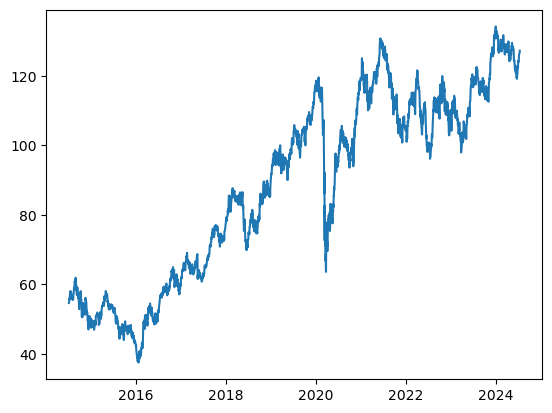

In [3]:
desc_stats = df.describe()

plt.plot(df.index,df.Último)

### **A análise a seguir realiza uma decomposição sazonal de uma série temporal e demonstra os resultados.**
#### *A decomposição sazonal é uma técnica usada para separar uma série temporal em componentes: tendência, sazonalidade e resíduo.*

##### **1° gráfico** -- Demonstra a série temporal original observada
##### **2° gráfico** -- Demonstra a tendência da série temporal
##### **3° gráfico** -- Demonstra a sazionalidade da série temporal
##### **4° gráfico** -- Demonstra a parte da séria temporal que não é explicada pelas tendências4).

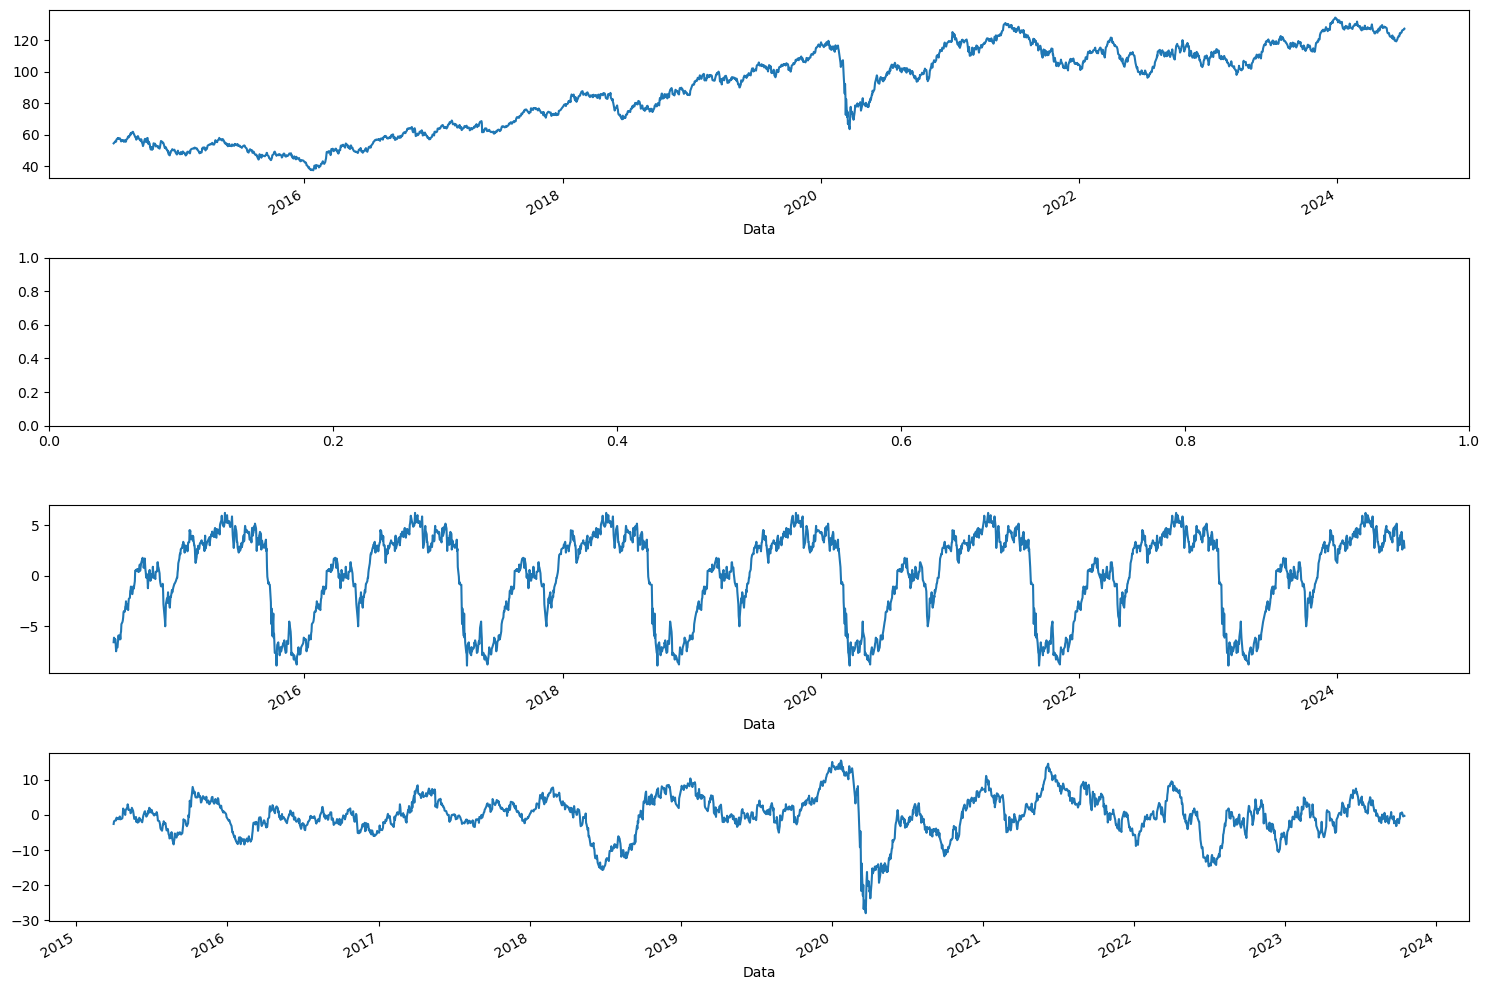

In [4]:
result = seasonal_decompose(df['Último'], period=365)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,10))

result.observed.plot(ax=ax1)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)

plt.tight_layout()

#### **Importação da Função de Teste de Estacionariedade, utilizamos para verificar a estacionariedade da série temporal**
#### **Em seguida o teste ADF** 


Valores Críticos:

Um p-valor alto maior que 0.05 indica que não existem evidências suficientes para rejeitar a hipótese nula. Em nossa demonstração o p-valor é 0.718, o que é considerado alto.


Esses valores representam os limiares para diferentes níveis de significância. Se o teste estatístico fosse menor que qualquer um desses valores críticos, poderíamos rejeitar a hipótese nula.
No nosso caso, -1.092 é maior que todos os valores críticos, reforçando a conclusão de que a série não é estacionária.


In [5]:
from statsmodels.tsa.stattools import adfuller
sns.set_style('darkgrid')
X = df['Último'].values

result = adfuller(X)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -1.0924511477447723
P-Value: 0.718072892338947
Valores críticos:
	1%: -3.432997028182592
	5%: -2.862709437378743
	10%: -2.5673925377546976


### **No gráfico a seguir encontramos o cálculo da média móvel em três fases: 1 Mês, 3 Meses e 1 Ano**

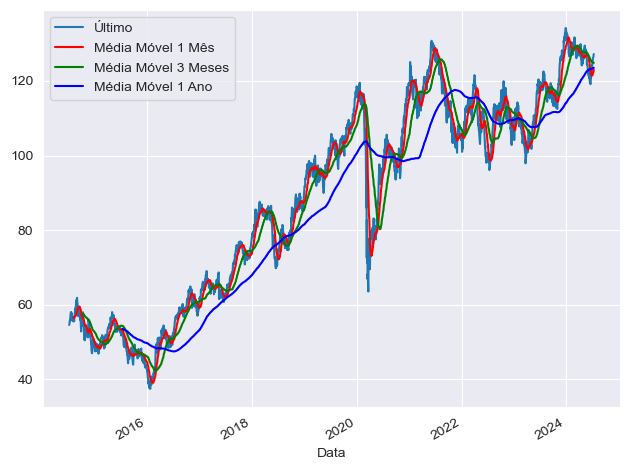

In [6]:
ma_1m = df['Último'].rolling(window=22).mean()  # Aproximadamente 1 mês
ma_3m = df['Último'].rolling(window=66).mean()  # Aproximadamente 3 meses
ma_1y = df['Último'].rolling(window=252).mean()  # Aproximadamente 1 ano


f, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma_1m.plot(label='Média Móvel 1 Mês', color='r')
ma_3m.plot(label='Média Móvel 3 Meses', color='g')
ma_1y.plot(label='Média Móvel 1 Ano', color='b')
plt.tight_layout()


ax.legend()
plt.tight_layout()
plt.show()


### **Análise logarítmica e média móvel**

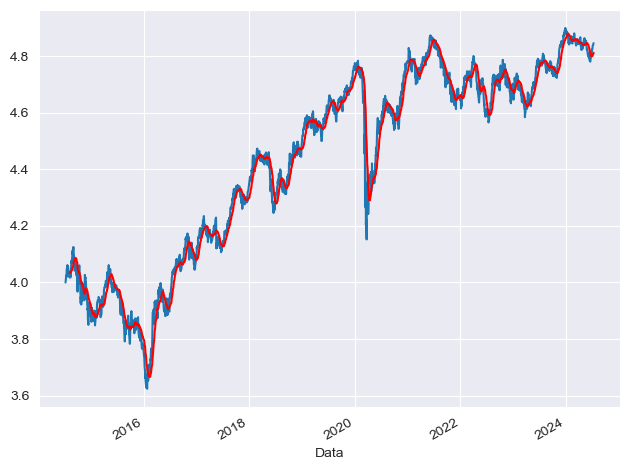

In [7]:
df_log = np.log(df)
ma_log = df_log.rolling(22).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

### **A seguir realizamos o cálculo da série temporal desviada, média móvel e desvio padrão**

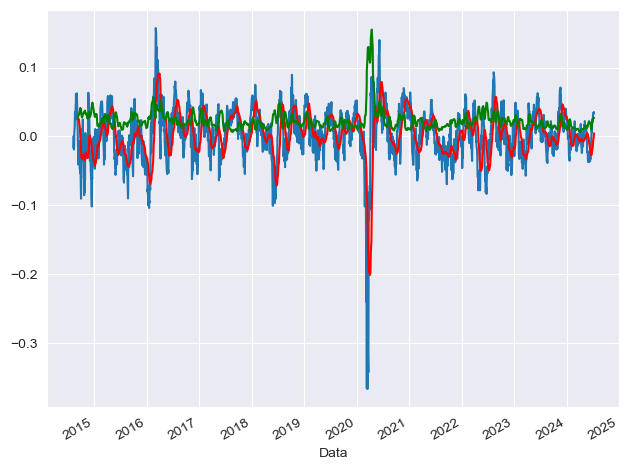

In [8]:
df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(22).mean()

std = df_s.rolling(22).std()

f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')

plt.tight_layout()


### **Novo teste ADF, para extração dos valores da série temporal desviada**

A série temporal dos dados é estável ao longo do tempo dificultando a nossa análise. Após aplicar a transformação logarítmica para subtrair a média móvel, conseguimos estabilizar os dados, tornando-os estacionários.

In [9]:
X_s = df_s.Último.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print("Valores críticos:")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -10.211540912850987
P-Value: 5.6213394439505016e-18
Valores críticos:
	1%: -3.4330240891671138
	5%: -2.862721387359731
	10%: -2.5673989001091995


### **Estacionariedade em Séries Temporais Logarítmicas Diferenciadas**

Com intuito de estabilizar a série de dados aplicamos a diferenciação de primeiro grau, calculando a média móvel e o desvio padrão das diferenças ao longo de 22 dias. A visualização resultante destaca as flutuações e a volatilidade da série diferenciada. A aplicação do Teste ADF na série diferenciada revelou um teste estatístico negativo e um p-valor baixo , confirmando que a série temporal diferenciada é estacionária.



Teste ADF
Teste Estatístico: -14.342583258939493
P-Value: 1.0539352868462776e-26
Valores críticos:
	1%: -3.4330394863905473
	5%: -2.8627281866400818
	10%: -2.567402520159153


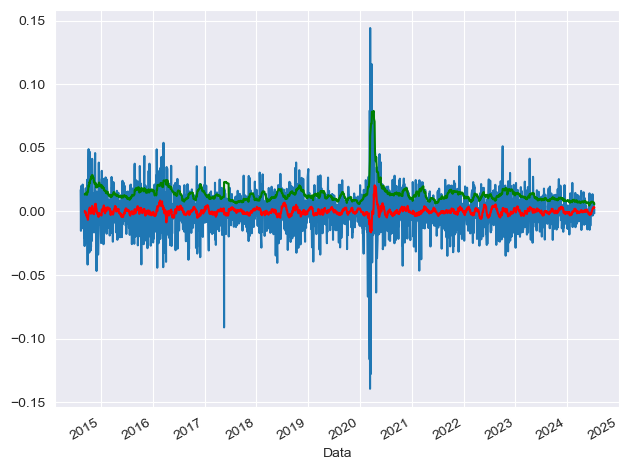

In [10]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(22).mean()

std_diff = df_diff.rolling(22).std()


f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

X_diff = df_diff.Último.dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

### **Cálculo ACF e PACF**

#### Autocorrelação (ACF)

A maioria de seus valores estão no intervalo de confiança, nossa série temporal tem pouco relação entre os lags mais distantes e não possui um componente forte de diferenciação.

#### Autocorrelação Parcial (PACF)

A maioria de seus valores também estão no intervalo de confiança, possuimos uma queda no primeiro lag e apenas alguns picos fora do intervalo de confiança. 

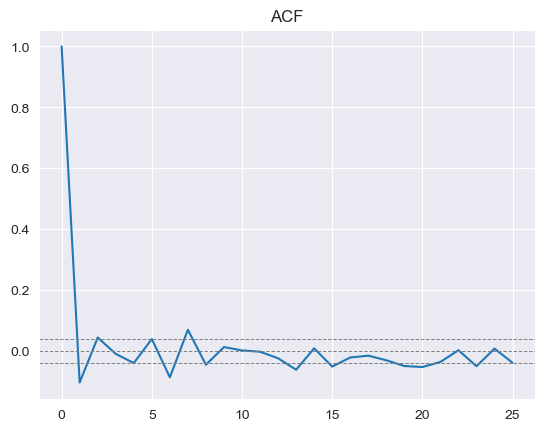

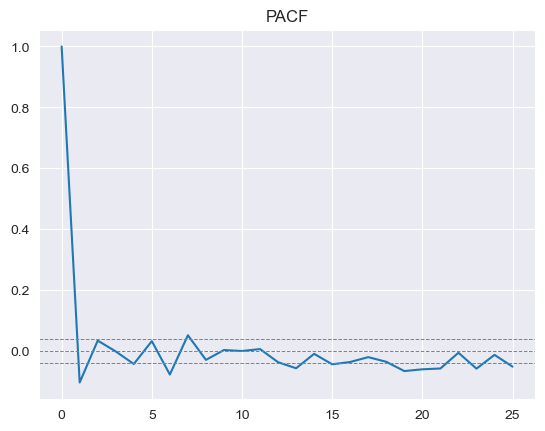

In [11]:
lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags=25)

plt.plot(lag_acf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)

plt.title("ACF")
plt.show()

plt.plot(lag_pacf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)

plt.title("PACF")
plt.show()


### **Outra demonstração em gráfico de ACF e PACF**

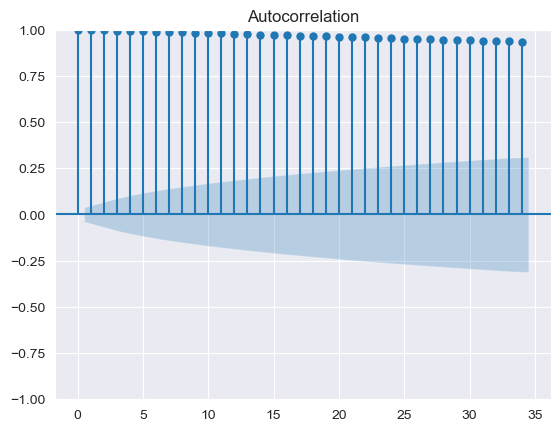

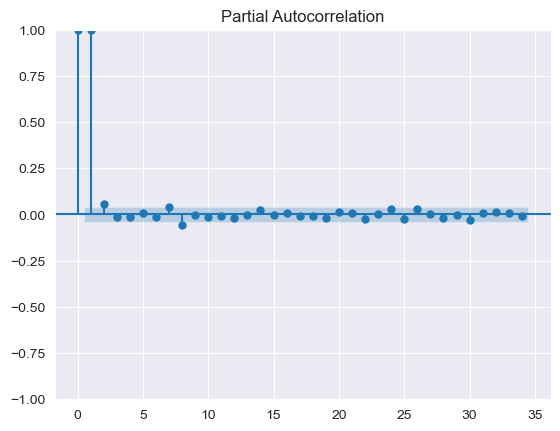

In [12]:
plot_acf(df.Último)
plot_pacf(df.Último)
plt.show()

# **Inicio das Análises de Séries Temporais**

In [13]:
df1 = pd.read_csv('DAO/IBOVESPA010.csv',index_col='ID', parse_dates=['Data'])

df1['Data'] = pd.to_datetime(df1['Data'], dayfirst=True) 

df_sorted = df1.sort_values(by='Data')

df_sorted.head()


,Data,Último,TIPO
ID,,,
2481,2014-07-10,54.593,IBOVESPA
2480,2014-07-11,54.786,IBOVESPA
2479,2014-07-14,55.744,IBOVESPA
2478,2014-07-15,55.974,IBOVESPA
2477,2014-07-16,55.717,IBOVESPA


In [14]:
df_sorted = df_sorted.rename(columns={'Data':'ds','Último':'y','TIPO':'unique_id'})

### **Preparação dos dados para treinamento e validação para o modelo de séries temporais**


In [15]:
## Treinando com dados de data anterior a 10/04/2024
treino = df_sorted.loc[(df_sorted['ds'] < '2024-04-10') & (~df_sorted['y'].isna())]

## Treinando com dados de data entre a do treinamento e 10/07/2024
valid = df_sorted.loc[(df_sorted['ds'] >= '2024-04-10') & (df_sorted['ds'] < '2024-07-10')]

h = valid['ds'].nunique()

In [16]:
treino.info()
## obj

<class 'pandas.core.frame.DataFrame'>
Index: 2417 entries, 2481 to 65
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         2417 non-null   datetime64[ns]
 1   y          2417 non-null   float64       
 2   unique_id  2417 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 75.5+ KB


In [17]:
valid.info()
##obj

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 64 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         63 non-null     datetime64[ns]
 1   y          63 non-null     float64       
 2   unique_id  63 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.0+ KB


### **Função WMAPE**

In [18]:
def wmape(y_true, y_pred): 
    return np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()

#### **Importação das bibliotecas e modelos de previsão de séries temporais**

In [19]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

In [20]:
model = StatsForecast(models=[Naive()], freq='D', n_jobs = -1)
model.fit(treino)

StatsForecast(models=[Naive])

In [21]:
forecast_df = model.predict(h=h, level=[90])
forecast_df = forecast_df.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

C:\Users\mateus.ferraz\AppData\Local\anaconda3\Lib\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [22]:
## Calculando o WMAPE para o modelo NAIVE
wmape1 = wmape(forecast_df['y'].values, forecast_df['Naive'].values)


In [23]:
print(forecast_df.head())
print(forecast_df.columns)


  unique_id         ds       Naive  Naive-lo-90  Naive-hi-90        y
0  IBOVESPA 2024-04-10  129.889999   127.712288   132.067719  128.054
1  IBOVESPA 2024-04-11  129.889999   126.810242   132.969757  127.396
2  IBOVESPA 2024-04-12  129.889999   126.118088   133.661911  125.946
3  IBOVESPA 2024-04-13  129.889999   125.534569   134.245422      NaN
4  IBOVESPA 2024-04-14  129.889999   125.020477   134.759521      NaN
Index(['unique_id', 'ds', 'Naive', 'Naive-lo-90', 'Naive-hi-90', 'y'], dtype='object')


### **Modelos Estatísticos e Avaliação de Desempenho usando WMAPE**

C:\Users\mateus.ferraz\AppData\Local\anaconda3\Lib\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 3.46%


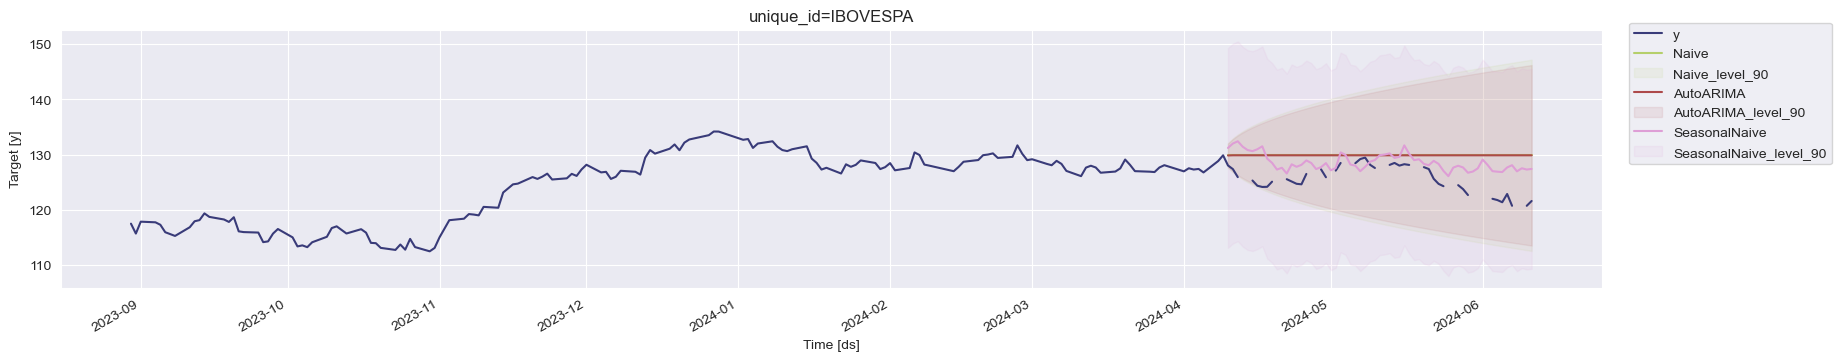

In [24]:
## Optamos por utilizar três modelos diferentes de previsão de séries temporais que são NAIVE, AutoARIMA e SeasonalNaive

model_a = StatsForecast(models=[Naive(), AutoARIMA(season_length=66), SeasonalNaive(season_length=66)], freq='D', n_jobs=-1)
model_a.fit(treino)


forecast_dfa = model_a.predict(h=h, level=[90])


forecast_dfa = forecast_dfa.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')


filtered_forecast_dfa = forecast_dfa[~np.isnan(forecast_dfa['y'])]


wmape4 = wmape(filtered_forecast_dfa['y'].values, filtered_forecast_dfa['AutoARIMA'].values)
print(f"WMAPE: {wmape4:.2%}")


model_a.plot(treino, forecast_dfa, level=[90], unique_ids=['IBOVESPA'], engine='matplotlib', max_insample_length=150)


## **Finalização da junção dos dados de Treino, Validação e Previsão**

C:\Users\mateus.ferraz\AppData\Local\anaconda3\Lib\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
C:\Users\mateus.ferraz\AppData\Local\Temp\ipykernel_2624\2819019659.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_forecast_dfa_2 = forecast_df[~np.isnan(forecast_dfa['y'])]


WMAPE: 3.51%


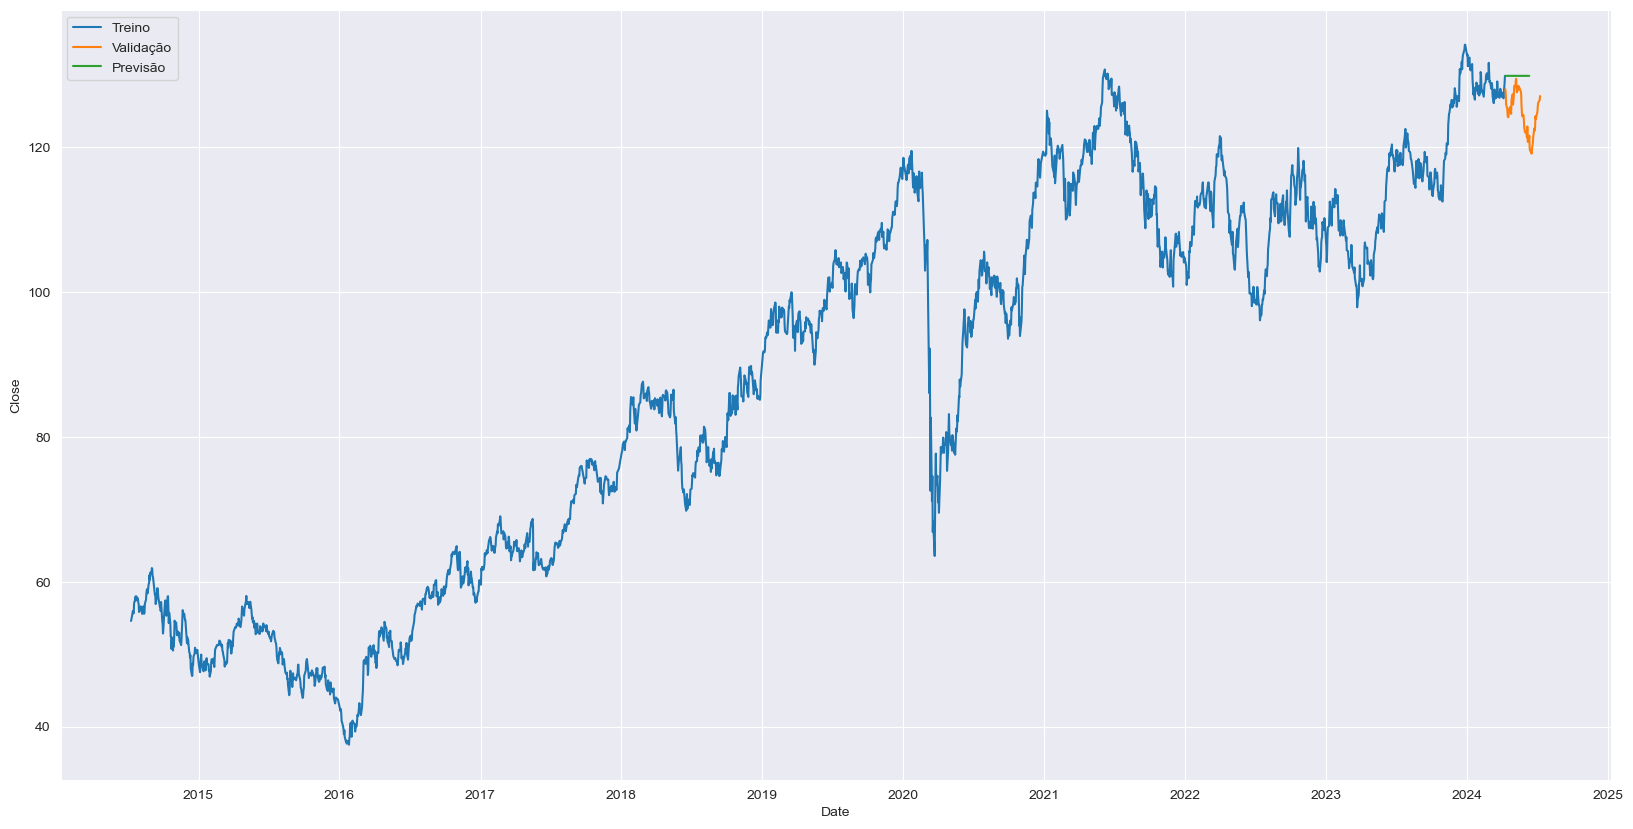

In [25]:
model = StatsForecast(models=[AutoARIMA(season_length=66 )],freq='D',n_jobs=-1)
model.fit(treino)

forecast_df = model.predict(h=h, level=[70])
forecast_df = forecast_df.merge(valid,on=['ds','unique_id'],how='inner')

filtered_forecast_dfa_2 = forecast_df[~np.isnan(forecast_dfa['y'])]

wmape2 = wmape(filtered_forecast_dfa_2['y'].values, filtered_forecast_dfa_2['AutoARIMA'].values)



print(f"WMAPE: {wmape2:.2%}")

plt.figure(figsize=(20, 10))
plt.plot(treino['ds'], treino['y'], label='Treino')
plt.plot(valid['ds'], valid['y'], label='Validação')
plt.plot(forecast_df['ds'], forecast_df['AutoARIMA'], label='Previsão')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

# **Conclusão da Análise de dados e Séries Temporáis**

## Técnica utilizada

##### Realizamos a utilização da técnica de Transformação logarítmica e diferenciação que nos permitiu remover variâncias e sazionalidade para preparar, treinar, prever e validar as séries de dados temporáis onde a análise exploratória serviu para transformar a série temporal o mais estacionaria possível facilitando a análise e manipulação dos dados.

## Divisão dos dados

##### Técnica utilizada foi Treino e Validação onde pera treino utilizamos um range dos últimos 10 anos para obter uma maior precisão no modelo de treinamento dando limite para nosso modelo ler padrões variados sem se ajustar demais aos mesmos treinamentos.

## Treinamento de Modelos

##### Foi utilizada a técnica treinamento de modelos onde realizamos algumas abordagens como AutoARIMA, NAIVE e SeasonalNaive. O SeasonalNaive realiza previsões para um determinado período onde são baseadas nos valores observados no mesmo ponto do ciclo sazonal anterior.

## Modelo de Previsão

##### Utilizamos o treinamento de modelos com foco no AutoARIMA, nosso objetivo era captar o padrão complexo da série temporal dessa forma o AutoArima ajusta automaticamente os padrões do modelo ARIMA deixando ele adequado para séries temporárias complexas. Com um WMAPE de 3.51 é possível validar que em média as previsões do AutoARIMA estão apenas 3.51% divergentes dos valores reais o que é uma boa previsão para o nosso modelo, respeitando assim a acuradidade de mais de 70%.
